What do we care about

* Making a daframe with all the days from various years categorized by regions 
* Collecting all the data for January and December 
* Collect the average for each month only for the Conus data
* Find means for both January and December data
* Plot the average per month over the period of time 
* Plot the average of each month over the period of time 
* If time permits do the pymc3 

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import calendar 
from util import *
import seaborn as sns 

%matplotlib inline

In [2]:
# Let's look at the first year 
df = pd.read_csv("ftp://ftp.cpc.ncep.noaa.gov/htdocs/degree_days/weighted/daily_data/1981/Population.Heating.txt", delimiter="|", skiprows=[0,1,2])
# Below I am changing the region column as the index instead of the standard 0, 1, ... n
df = df.set_index('Region')

In [3]:
df.head()

,19810101,19810102,19810103,19810104,19810105,19810106,19810107,19810108,19810109,19810110,...,19811222,19811223,19811224,19811225,19811226,19811227,19811228,19811229,19811230,19811231
Region,,,,,,,,,,,,,,,,,,,,,
1,51,46,55,66,62,51,42,51,58,53,...,40,32,31,34,39,37,36,32,38,44
2,45,42,50,59,56,47,42,51,56,52,...,38,25,28,32,36,34,32,30,37,39
3,36,43,51,62,59,48,49,57,55,57,...,34,36,41,41,36,35,38,45,48,39
4,33,40,46,55,47,39,47,48,48,54,...,36,44,44,42,39,41,47,53,48,44
5,24,23,26,27,34,31,23,30,31,31,...,21,9,12,16,20,19,18,16,21,22


In [4]:
result, JanuaryData, DecemberData, avgMonth = comb_data(1981, 2017, df)

In [5]:
result

,19810101,19810102,19810103,19810104,19810105,19810106,19810107,19810108,19810109,19810110,...,20171222,20171223,20171224,20171225,20171226,20171227,20171228,20171229,20171230,20171231
Region,,,,,,,,,,,,,,,,,,,,,
1,51,46,55,66,62,51,42,51,58,53,...,40,32,32,34,43,53,59,59,57,59
2,45,42,50,59,56,47,42,51,56,52,...,31,25,30,33,43,49,54,53,50,55
3,36,43,51,62,59,48,49,57,55,57,...,29,32,41,47,58,62,60,54,54,60
4,33,40,46,55,47,39,47,48,48,54,...,39,45,47,55,61,64,57,54,62,68
5,24,23,26,27,34,31,23,30,31,31,...,12,7,12,20,21,22,27,26,24,29
6,24,29,28,30,42,36,32,39,35,37,...,9,9,22,33,31,35,37,33,32,39
7,14,17,17,18,22,18,19,20,18,18,...,9,19,19,24,23,28,28,23,19,27
8,22,22,23,23,24,26,26,28,28,27,...,36,33,34,30,32,29,26,24,27,30
9,14,16,14,15,14,15,17,18,17,16,...,23,20,18,17,17,15,13,11,12,15


In [7]:
# let's make sure we have all the datapoints for the Janauary and December data--should have 37 years * 31 days = 1147 data points
print("January data: " + str(len(JanuaryData)))
print("December data: " + str(len(DecemberData)))

January data: 1147
December data: 1147


In [11]:
# Now let's look at the means for January and December
print("The mean heating days for January from 1981 to 2017 is {}".format(np.round(np.mean(JanuaryData), 2)))
print("The mean heating days for December from 1981 to 2017 is {}".format(np.round(np.mean(DecemberData), 2)))

The mean heating days for January from 1981 to 2017 is 28.31
The mean heating days for December from 1981 to 2017 is 25.67


In [17]:
print("The average mean heating days from 1981 to 2017 is {}".format(np.round(np.mean(avgMonth), 2)))

The average mean heating days from 1981 to 2017 is 11.77


In [21]:
sns.set(rc={'figure.figsize':(18,8)})

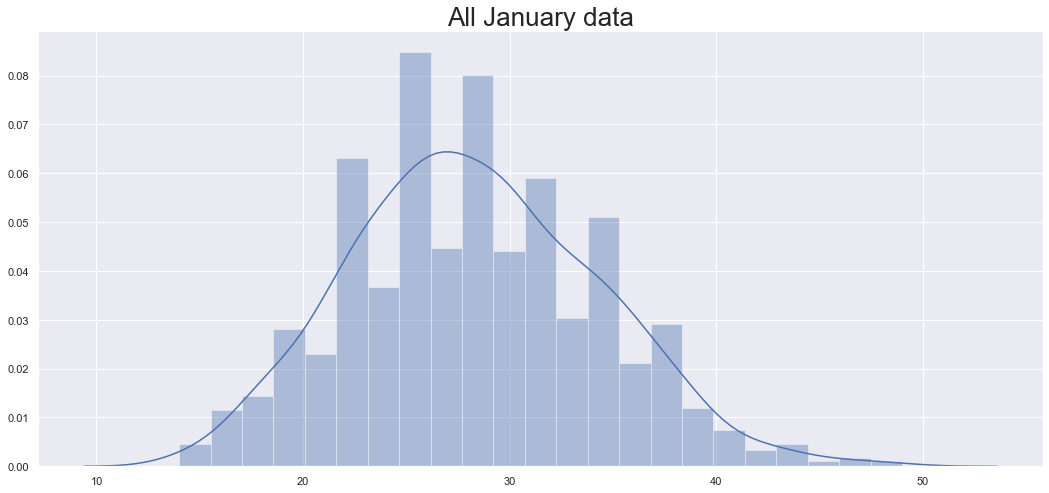

In [25]:
sns.distplot(JanuaryData).set_title('All January data', fontsize = 26);

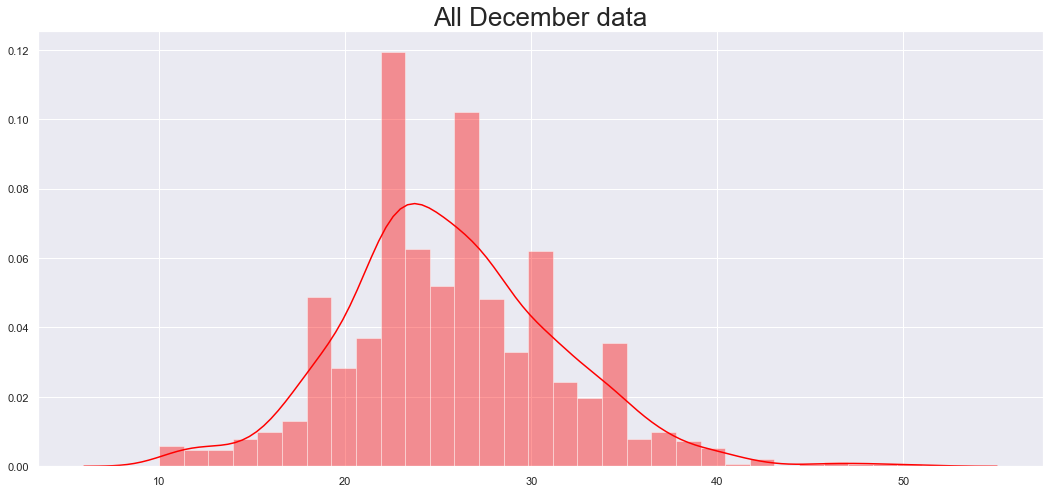

In [29]:
sns.distplot(DecemberData, color = 'red').set_title('All December data', fontsize = 26);

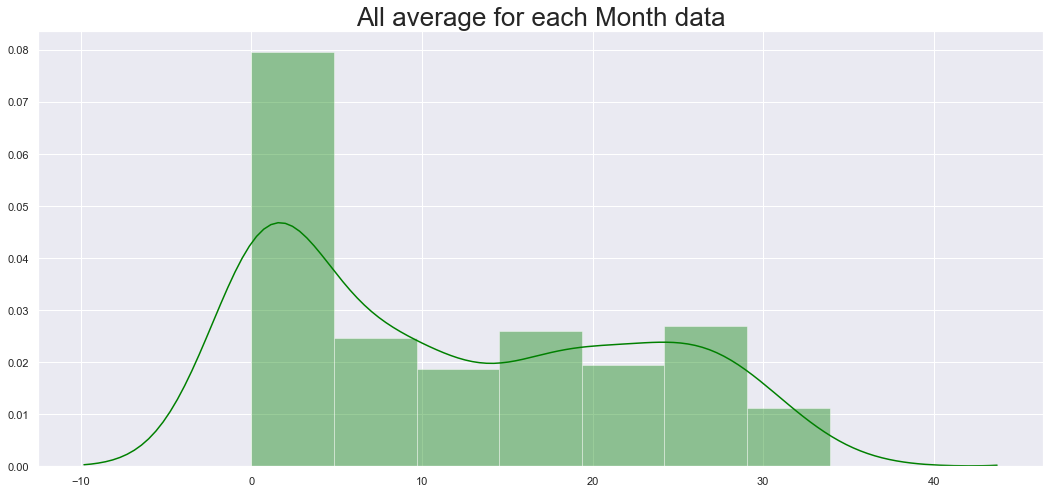

In [30]:
sns.distplot(avgMonth, color = 'green').set_title('All average for each Month data', fontsize = 26);

In [34]:
"""Months444 will represent each month for the 444 months when I plot the averages for each month starting
with Month 1 as Jan. 1981 and ending with month 444 (Dec. 2017)"""
Months444 = range(1,445)

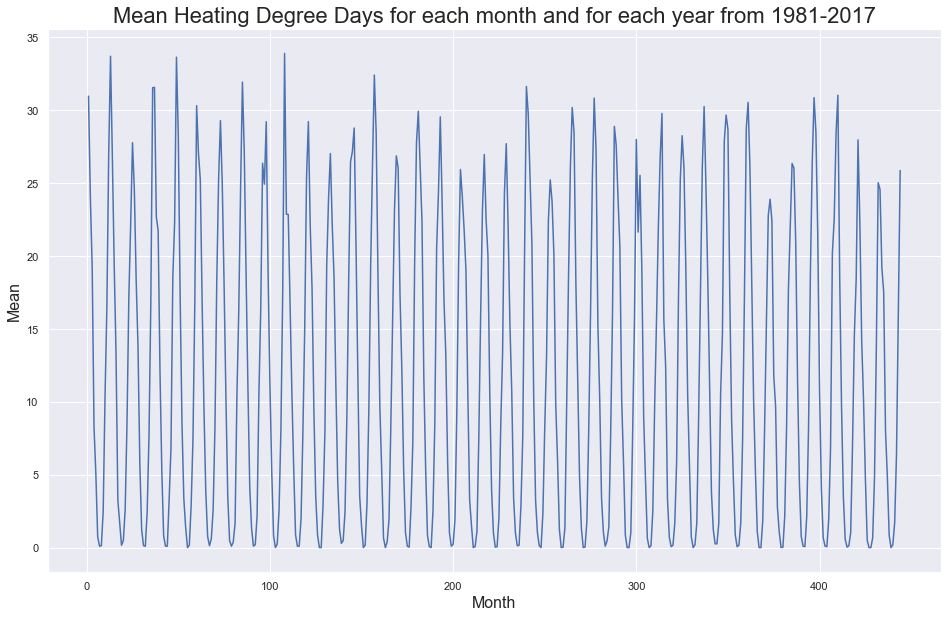

In [35]:
# Now I'm going to plot the data 
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(Months444, avgMonth);
ax.set_xlabel("Month", fontsize=16);
ax.set_ylabel("Mean", fontsize=16);
ax.set_title("Mean Heating Degree Days for each month and for each year from 1981-2017", fontsize=22);